In [127]:
# Importing Libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import scipy
from scipy.stats import norm
from scipy.stats import shapiro
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

sns.set(rc={'figure.figsize':(15, 5)})

# P-value
alpha = 0.05

# Step 1
Import	data	from	"BSCY4.csv".

In [128]:
# Read Data
data = pd.read_csv("BSCY4.csv")

# Question 2
Assess	 normality	 of	 MPG	 values.	 Do	 the	 numbers	 appear	 to	 come	 from	 a	 normal	 distribution?	 If	 not,	 can	 a	 transformation	 be	applied	so	that	its	result	is	normal?

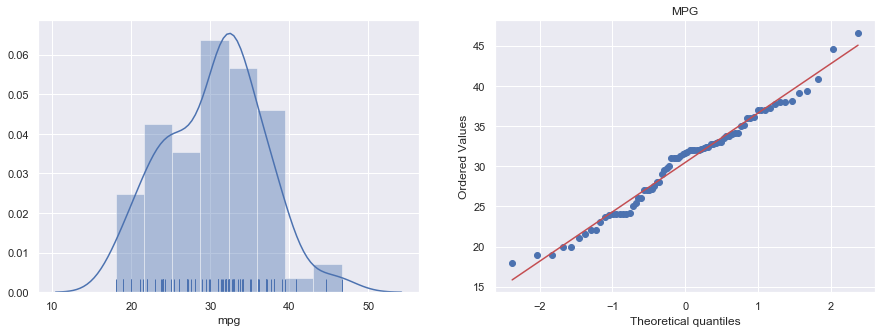

In [129]:
# First we test for distribution visually
plot, ax = plt.subplots(1,2)
sns.distplot(data["mpg"], kde=True, rug=True, ax = ax[0])
stats.probplot(data["mpg"], dist="norm", plot=plt)
plt.title("MPG")
plt.show()

Based on the distplot above we cant visually prove that MPG does follows a normal distribution. So I calculated the 
p-value on the mpg and the result showed (0.9797349572181702, 0.24196530878543854). 

- since the p-value(right) > 0.05, we have a normal distribution

In [130]:
# Shapiro-Wilk Test for 'MPG'
stat, p = shapiro(data['mpg'])
if p > alpha:
    print('MPG follows a normal distribution')
else:
    print('MPG does not follow a normal distribution')

MPG follows a normal distribution


# Question 3

Perform	 the	 same	 assessment	 (i.e.	 as	 Step	 2)	 for	 other	numerical	Cields	included	in	the	data	set.

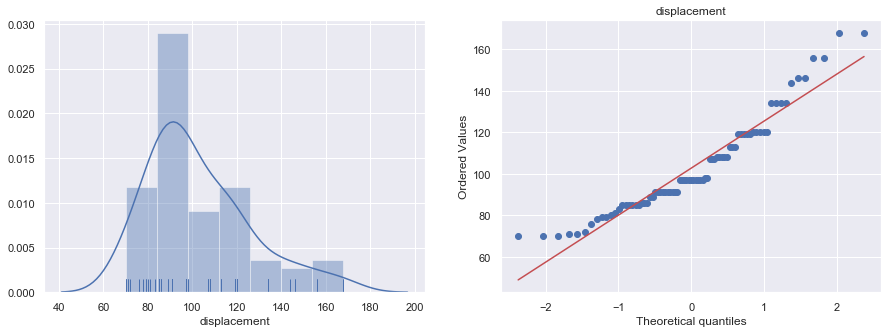

p-value:  0.00011616637493716553
displacement does not follow a normal distribution. The Q-Q plot also confirms this


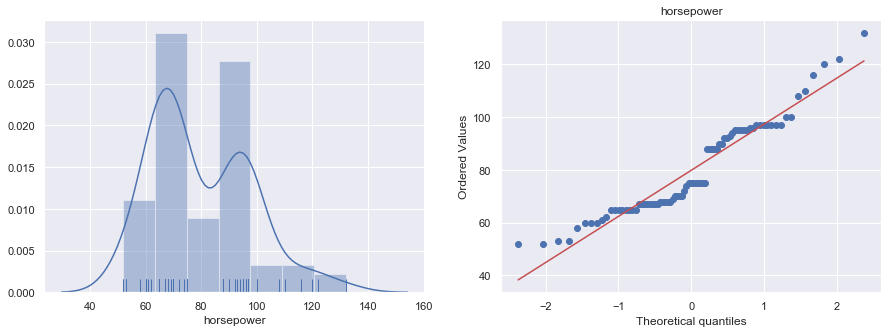

p-value:  0.00016959250206127763
horsepower does not follow a normal distribution. The Q-Q plot also confirms this


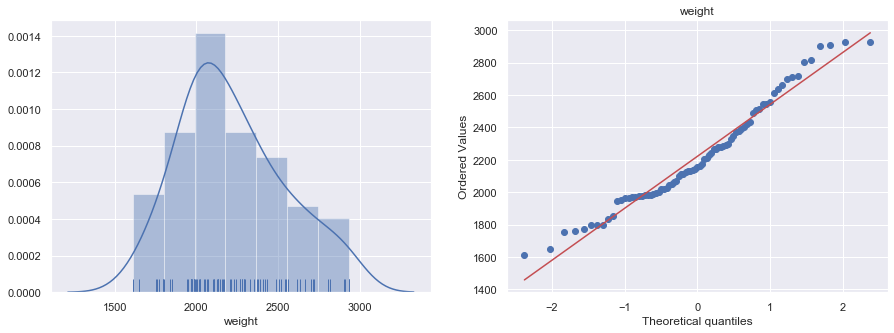

p-value:  0.020406033843755722
weight does not follow a normal distribution. The Q-Q plot also confirms this


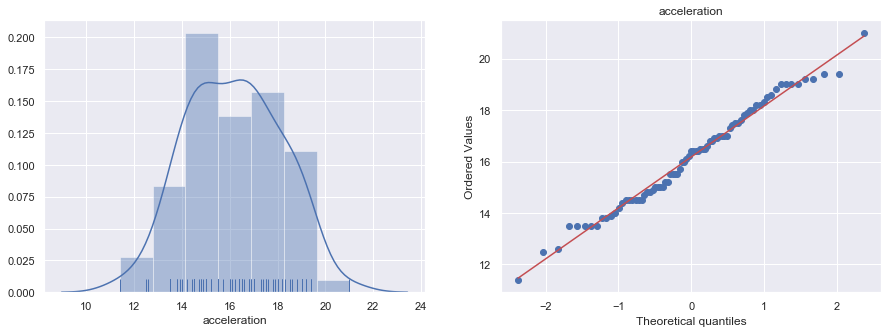

p-value:  0.5289148092269897
acceleration follows a normal distribution. The Q-Q plot also confirms this.


In [131]:
# array of fields
data_series = ['displacement', 'horsepower', 'weight', 'acceleration']

# Assesmenet on all numerical fields
for x in data_series:
    # distribution curve and Q-Q plot
    plot, ax = plt.subplots(1,2)
    sns.distplot(data[x], kde=True, rug=True, ax = ax[0])
    stats.probplot(data[x], dist="norm", plot=plt)

    plt.title(x)
    plt.show()
    
    # Shapiro to test for normal distribution
    stat, p = shapiro(data[x])
    print("p-value: ", p)
    if p > alpha:
        print(x,'follows a normal distribution. The Q-Q plot also confirms this.')
    else:
        print(x, 'does not follow a normal distribution. The Q-Q plot also confirms this')

p-value:  0.14758263528347015
Displacement follows a normal distribution


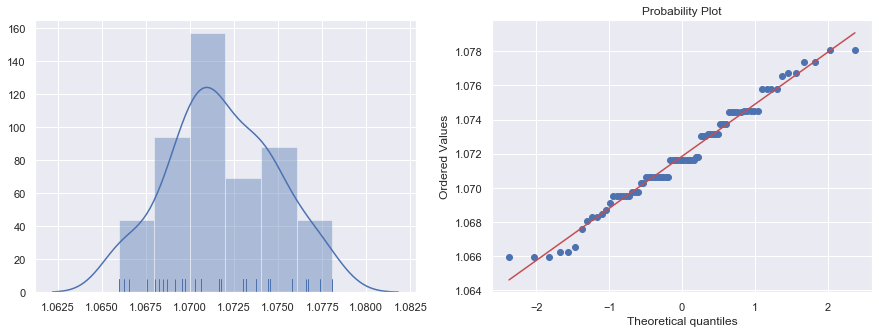

In [132]:
# Transforming 'Displacement'

# We Normalise the exponential data using Boccox
nm = stats.boxcox(data['displacement'])

# Now we test the normalise data using Shapiro-Wild Test
stat, p = shapiro(nm[0])
if p > alpha:
    print('p-value: ', p)
    print('Displacement follows a normal distribution')
else:
    print('Displacement does not follow a normal distribution')
    
# Normal Curve graph and Q-Q plot    
plot, ax = plt.subplots(1,2)
sns.distplot(nm[0], kde=True, rug=True, ax = ax[0])
stats.probplot(nm[0], dist="norm", plot=plt)
plt.show()

weight follows a normal distribution


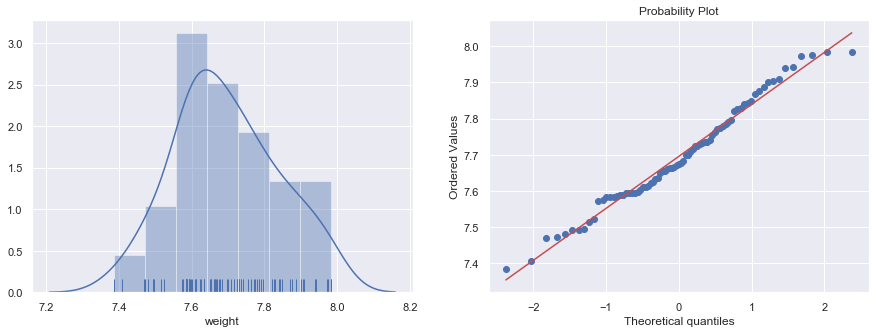

In [133]:
# Transforming 'weight' using log transformation
data["weight"] = data["weight"].apply(np.log)

# Now we test the normalise data using Shapiro-Wild Test
stat, p = shapiro(data["weight"])
if p > alpha:
    print('weight follows a normal distribution')
else:
    print('weight does not follow a normal distribution')
    
# Normal Curve graph and Q-Q plot    
plot, ax = plt.subplots(1,2)
sns.distplot(data["weight"], kde=True, rug=True, ax = ax[0])
stats.probplot(data["weight"], dist="norm", plot=plt)
plt.show()

# Question 4

Which	of	numerical	Cields	satisfy	the	assumptions	of	regression	analysis?

## The Regression Assumptions:
     1. Predictor Independence
     2. Normality of Predictors and outcome
     3. Homoscedasticity of Residuals
     4. Lin. Dependency Between Predictors and Outcome.
     
# Answer
Out of all the data fields only Acceleration and Weight satisfy the regression assumptions because they are the only normal predictor.

# Question 5

Build	 an	 initial	 regression	 model	 that	 incorporates	 only	 one	numerical	 predictor.	 Ensure	 the	 model	 satisCies	 all	 of	 the	regression	assumptions.

In [140]:
# I wil use mpg and acceleration since they both satisfy the assumptions. 
# If the results returns 'Independet' we will use them in the regrssion analysis as our predictors
p = stats.chi2_contingency(pd.crosstab(index=data['acceleration'], columns=data['weight']))[1]

# message
if p > 0.05:
    print('acceleration'," and ", 'weight', " are: Independent")
else: 
    print('acceleration'," and ", 'weight', " are: Dependent")

acceleration  and  weight  are: Independent


                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              2255.
Date:                Mon, 09 Dec 2019   Prob (F-statistic):                    2.52e-59
Time:                        01:02:17   Log-Likelihood:                         -249.26
No. Observations:                  79   AIC:                                      500.5
Df Residuals:                      78   BIC:                                      502.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

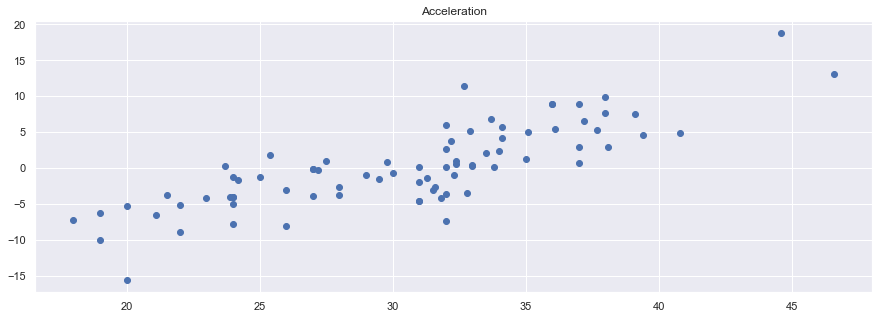

In [158]:
# We build a regression model that satisifies all of the regression assumptions with acceleration

# Build and fit the model using ordinary least squares
model = sm.OLS(data["mpg"], data["acceleration"])
results = model.fit()
print(results.summary())

plt.scatter(data["mpg"], results.resid)
plt.title("Acceleration")
plt.show()

The model built is valid because there is Homoscedasticity.

# Question 6

Introduce	 at	 least	 1	 other	 numerical	 predictor.	 Ensure	 the	extended	 model	 remains	 valid	 (i.e.	 all	 of	 the	 regression	assumptions	are	satisCied).	.

In [168]:
# Stack the columns with new numerical predictor 'weight'
X = np.column_stack((data['mpg'], data['weight']))
X = sm.add_constant(X)

# Build and fit the model using ordinary least squares
model = sm.OLS(data['acceleration'], X)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           acceleration   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     18.17
Date:                Mon, 09 Dec 2019   Prob (F-statistic):           3.56e-07
Time:                        01:13:32   Log-Likelihood:                -149.12
No. Observations:                  79   AIC:                             304.2
Df Residuals:                      76   BIC:                             311.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.6993     12.775      5.221      0.0

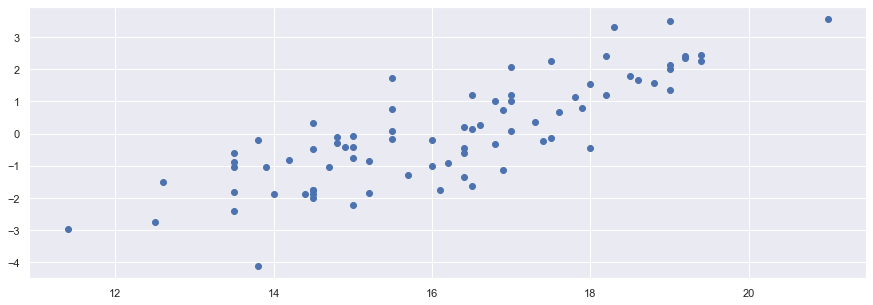

In [169]:
plt.figure()
plt.scatter(data['acceleration'], result.resid)
plt.show()

# Step 7
What	 can	 you	 say	 about	 the	 extended	 regression	 model?	 Is	there	mediation	effect	present?	

### Answer:

Based on the extended regression model we can see that the R-Squared value before weight was 0.967 and when weight was added the R-Squared value dropped to 0.323, this means that there is an mediation effect so 'weight' needs to be removed.

# Step 8
Introduce	 a	 categorical	 variable	 into	 the	 model.	 Are	 all	 of	 the	categories	signiCicant?	

                            OLS Regression Results                            
Dep. Variable:           acceleration   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     11.90
Date:                Mon, 09 Dec 2019   Prob (F-statistic):           3.20e-05
Time:                        01:33:12   Log-Likelihood:                -153.79
No. Observations:                  79   AIC:                             313.6
Df Residuals:                      76   BIC:                             320.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.7190      1.016     11.536      0.0

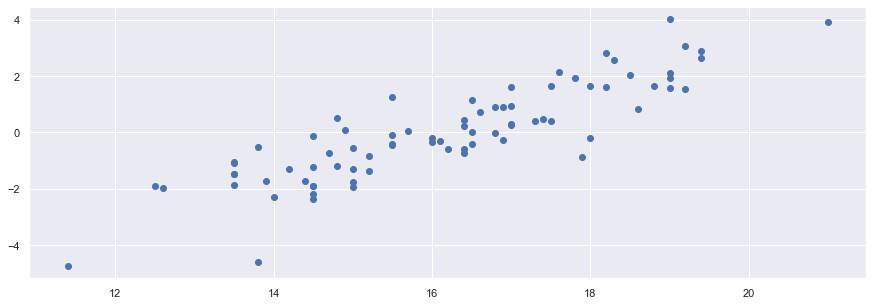

In [184]:
# Categorical variable
data['model year'] = data['model year'].astype('category').cat.codes

# Stack the columns
X = np.column_stack((data['mpg'], data['model year']))
X = sm.add_constant(X)

# Build and fit the model using ordinary least squares
model = sm.OLS(data['acceleration'], X)
results = model.fit()
print(results.summary())

plt.figure()
plt.scatter(data['acceleration'], results.resid)
plt.show()

In [180]:
# I think that other categories would be insignificat specially 'origin' because it has one value throught. 
# The second best would be cylinders becasue it has only 3 unique values.

print('Origin: ', data['origin'].unique())
print('Cylinders: ', data['cylinders'].unique())

Origin:  [3]
Cylinders:  [4 3 6]


# Step 9
Is	there	a	potential	mediation	effect	governed	by	the	categorical	variable?	If	yes,	how	should	the	model	be	updated?	

### Answer 
basing on the change of values in R-Squared we proved that there is a mediation effect, the model should be updated by removing the categories in 'Model Year' with p-values above 0.05 because these values are not relevant to our model.